***Name : S.SANJTIH***

***ID NO : 190562G***

***Course Code : EN2550***
### **CNNs and Transfer Learning**
---

In [54]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import sys

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


lib_dir="E:\Coding\Computer Vision\cv-libs"
sys.path.append(lib_dir)
from show_images import show_images

**$Q_{01}.$ Implementation of the LeNet5 network**

In [51]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Padding
padding = tf.constant([[0, 0], [2, 2], [2, 2]])
train_images = tf.pad(train_images, padding, constant_values=0)
test_images = tf.pad(test_images, padding, constant_values=0)

print("Train Images Shape : ", train_images.shape)
print("Train Labels Shape : ", train_labels.shape)
print("Test Images Shape : 0", test_images.shape)
print("Test Labels Shape : 0", test_labels.shape)
class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

train_images=tf.dtypes.cast(train_images,tf.float32)
test_images=tf.dtypes.cast(test_images,tf.float32)
train_images,test_images=train_images[...,np.newaxis]/255.0,test_images[...,np.newaxis]/255.0


Train Images Shape :  (60000, 32, 32)
Train Labels Shape :  (60000,)
Test Images Shape : 0 (10000, 32, 32)
Test Labels Shape : 0 (10000,)


In [5]:
# MODEL
model = models.Sequential()
model.add(layers.Conv2D(6,(5,5),activation="relu",input_shape=(32,32,1)))
model.add(layers.AveragePooling2D(2,2))
model.add(layers.Conv2D(16,(5,5),activation="relu"))
model.add(layers.AveragePooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(120,activation='relu'))
model.add(layers.Dense(84,activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d_2 (Averag  (None, 14, 14, 6)        0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_3 (Averag  (None, 5, 5, 16)         0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 400)               0         
                                                                 
 dense_3 (Dense)             (None, 120)              

In [52]:
model.fit(train_images,train_labels,epochs=5)
test_loss,train_loss=model.evaluate(test_images,test_labels,verbose=2)

Epoch 1/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0294 - accuracy: 0.9905
Epoch 2/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.0227 - accuracy: 0.9927
Epoch 3/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0181 - accuracy: 0.9944
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0138 - accuracy: 0.9958
Epoch 5/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.0119 - accuracy: 0.9962
313/313 - 3s - loss: 0.0335 - accuracy: 0.9903 - 3s/epoch - 8ms/step


1/1 [==============================] - 0s 22ms/step


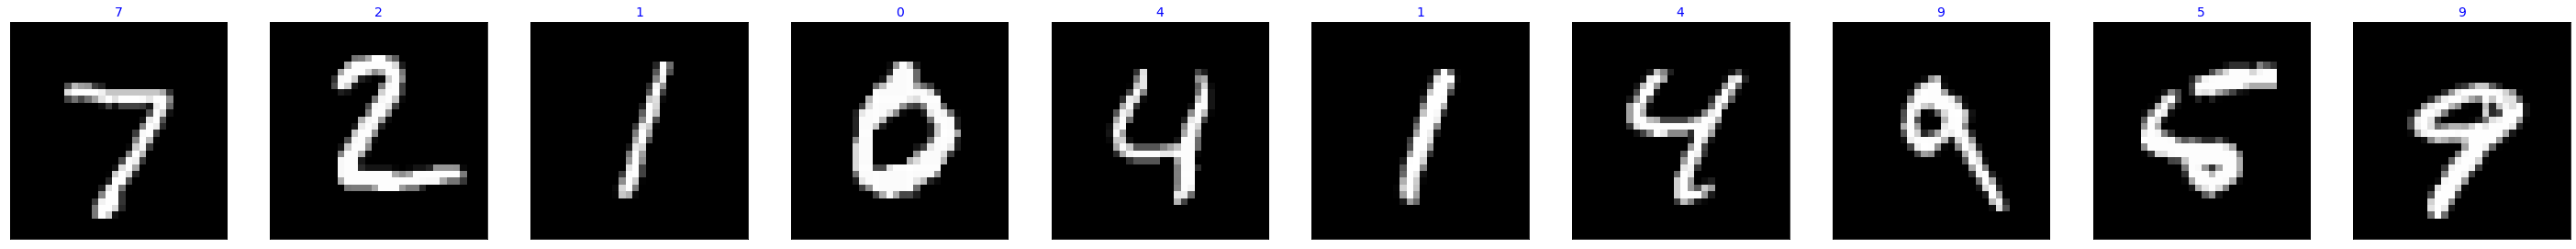

In [96]:
images_display=[]
for i in range(10):
    img_array = tf.keras.utils.img_to_array(test_images[i])
    img_array = tf.expand_dims(img_array, 0) 
    predictions = model.predict(img_array)
    images_display.append([test_images[i],(np.min(test_images[i]),np.max(test_images[i])),np.argmax(predictions[0])])
show_images(images_display)

**$Q_{02}.$ Implementation of CNN for CIFAR10**

In [99]:
# Question 02 --- > CIFAR10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizing the values
train_images, test_images = train_images/255, test_images/255
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(train_images.shape)

(50000, 32, 32, 3)


In [100]:
model = models.Sequential()
model.add(layers.Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10))

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
print(model.summary())

model.fit(train_images,train_labels,epochs=5)
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_34 (Conv2D)          (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_35 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_36 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 flatten_12 (Flatten)        (None, 2048)            

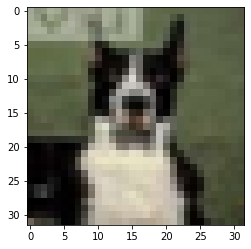

1/1 [==============================] - 0s 22ms/step
Predicted Model :  dog


In [ ]:
# class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
photo_no=3450
plt.imshow(test_images[photo_no])
plt.show()

img_array = tf.keras.utils.img_to_array(test_images[photo_no])
img_array = tf.expand_dims(img_array, 0)
predictions = model.predict(img_array)
print("Predicted Model : ",class_names[np.argmax(predictions[0])])

**$Q_{03}.$ Implementation of given network**

In [10]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Padding
padding = tf.constant([[0, 0], [2, 2], [2, 2]])
train_images = tf.pad(train_images, padding, constant_values=0)
test_images = tf.pad(test_images, padding, constant_values=0)

class_names = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

train_images=tf.dtypes.cast(train_images,tf.float32)
test_images=tf.dtypes.cast(test_images,tf.float32)
train_images,test_images=train_images[...,np.newaxis]/255.0,test_images[...,np.newaxis]/255.0

In [12]:
model_base = models.Sequential()
model_base.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,1)))
model_base.add(layers.MaxPool2D(2,2))
model_base.add(layers.Conv2D(64,(3,3),activation="relu"))
model_base.add(layers.MaxPool2D(2,2))
model_base.add(layers.Conv2D(64,(3,3),activation="relu"))
model_base.add(layers.Flatten())
model_base.add(layers.Dense(64,activation='relu'))
model_base.add(layers.Dense(10))

model_base.compile(optimizer=keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
print(model_base.summary())

model_base.fit(train_images,train_labels,epochs=2)
test_loss,test_acc=model_base.evaluate(test_images,test_labels,verbose=2)
model_base.save_weights('saved_weights/')

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_4 (Flatten)         (None, 1024)             

**$Q_{04}.$ Loading the weights saved into another model and training for two more epochs...**

In [23]:
model_lw = models.Sequential()
model_lw.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(32,32,1)))
model_lw.add(layers.MaxPool2D(2,2))
model_lw.add(layers.Conv2D(64,(3,3),activation="relu"))
model_lw.add(layers.MaxPool2D(2,2))
model_lw.add(layers.Conv2D(64,(3,3),activation="relu"))
model_lw.add(layers.Flatten())
model_lw.add(layers.Dense(64,activation='relu'))
model_lw.add(layers.Dense(10))

model_lw.compile(optimizer=keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
print(model_lw.summary())

model_lw.load_weights('saved_weights/')

model_lw.fit(train_images,train_labels,epochs=2)
test_loss,test_acc=model_lw.evaluate(test_images,test_labels,verbose=2)

model_lw.save('saved_model/')

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_10 (Flatten)        (None, 1024)            

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


**$Q_{05}.$ Loading above model...**

In [20]:
# Loading the Model
model_ld = keras.models.load_model('saved_model/')
print(model_ld.summary())
model_ld.evaluate(test_images,test_labels,verbose=2)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 4, 4, 64)          36928     
                                                                 
 flatten_9 (Flatten)         (None, 1024)             

[0.03310105949640274, 0.9902999997138977]

**$Q_{06}.$ Replacing last layer with fresh dence layer of 10 output nodes and train for two epchos...**

In [34]:
base_inputs = model_ld.layers[0].input
base_outputs = model_ld.layers[-2].output
output = layers.Dense(10)(base_outputs)

new_model = keras.Model(inputs=base_inputs,outputs=output)
new_model.compile(optimizer=keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
print(new_model.summary())


new_model.fit(train_images,train_labels,epochs=2)
test_loss,test_acc=model_lw.evaluate(test_images,test_labels,verbose=2)
print(test_acc)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_25_input (InputLayer  [(None, 32, 32, 1)]      0         
 )                                                               
                                                                 
 conv2d_25 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                           

**$Q_{07}$. Transfer Learning : Making the loaded layers as untrainable and repeat above process...**

In [47]:
model_for_tl = keras.models.load_model('saved_model/')
model_for_tl.trainable = False
for layers in model_for_tl.layers:
    assert layers.trainable == False


base_inputs = model_for_tl.layers[0].input
base_outputs = model_for_tl.layers[-2].output
output = layers.Dense(10)(base_outputs)


new_model = keras.Model(inputs=base_inputs,outputs=output)
new_model.compile(optimizer=keras.optimizers.Adam(),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
print(new_model.summary())


new_model.fit(train_images,train_labels,epochs=2)
test_loss,test_acc=model_lw.evaluate(test_images,test_labels,verbose=2)
print("Test Accuracy : ", test_acc)

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28_input (InputLayer  [(None, 32, 32, 1)]      0         
 )                                                               
                                                                 
 conv2d_28 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 15, 15, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                           

**$Q_{08}.$ Load a pre-trained ResNet model. Connect an output layer of 5 nodes. Feed arrays of random numbers of input images and transfer learn**

In [155]:
# Question 02 --- > CIFAR10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalizing the values
train_images, test_images = train_images/255, test_images/255
class_names = ['airplane', 'automobile', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck']
print(train_images.shape)


(50000, 32, 32, 3)


In [161]:
model_tl=keras.applications.resnet_v2.ResNet50V2()

model_tl.trainable=False
for layer in model_tl.layers:
    assert layer.trainable==False

base_innputs=model_tl.layers[0].input
base_ouputs=model_tl.layers[-2].output
output=layers.Dense(5)(base_ouputs)

model_tl=keras.Model(inputs=base_innputs,outputs=output)
model_tl.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
print(model_tl.summary())

train_images=np.random.randint(0,256,(1000,224, 224, 3))
train_labels=np.random.randint(0,5,1000)

model_tl.fit(train_images,train_labels,epochs=3,verbose=2)

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_7[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           